In [42]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Dataset
df = pd.read_csv("heart.csv")

In [44]:
df = df.replace("?", np.nan)
df = df.dropna()


In [46]:
df = df.apply(pd.to_numeric, errors='coerce')

# Remove negative values if not logical
df = df[(df['chol'] >= 0) & (df['thalach'] >= 0) & (df['trestbps'] >= 0)]

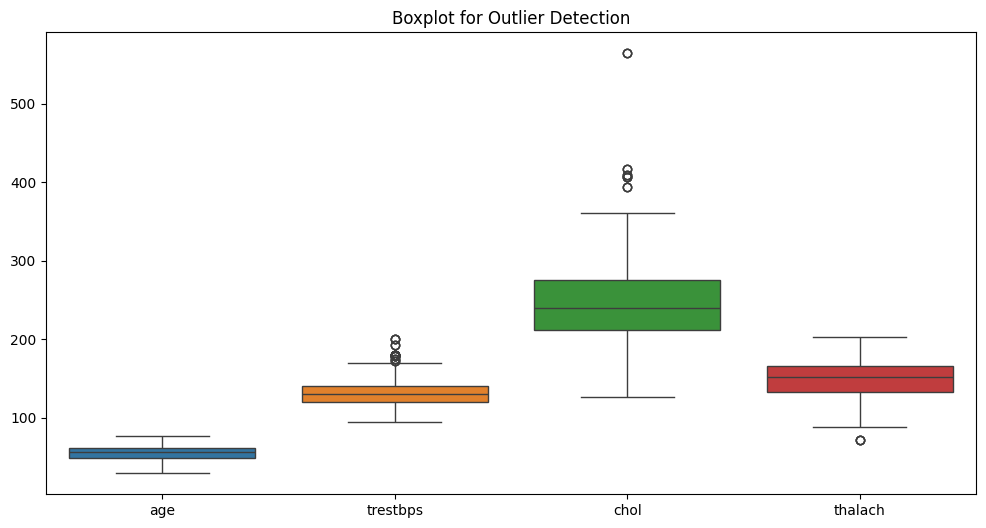

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach']])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [50]:

# Optional: Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [52]:
X = df.drop('target', axis=1)
y = df['target']

# Normalize the features
X_label = StandardScaler().fit_transform(X)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y, test_size=0.3, random_state=42)


In [56]:
lr = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [58]:
# Accuracy
print("Logistic Regression:", accuracy_score(y_test, lr.predict(X_test)))
print("KNN:", accuracy_score(y_test, knn.predict(X_test)))

Logistic Regression: 0.8744588744588745
KNN: 0.8571428571428571
